In [648]:
import seaborn as sns
import numpy as np
import skimage.io
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from keras.models import Sequential
from keras.utils import Sequence
from keras.layers.core import Dense, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten
from keras.utils import np_utils


In [649]:
label_dict = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'
}

In [650]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

itr = train_generator = train_datagen.flow_from_directory(
        'data/training',
        target_size=(28, 28),
        batch_size=60000,
        class_mode='binary')

test = test_generator = test_datagen.flow_from_directory(
        'data/testing',
        target_size=(28,28),
        batch_size=10000,
        class_mode='binary')


Found 60000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [651]:
X,Y = itr.next()

In [652]:
X.shape

(60000, 28, 28, 3)

In [653]:
Y.shape

(60000,)

In [654]:
X = np.array(X)
Y = np.array(Y)

In [655]:
X.shape

(60000, 28, 28, 3)

In [656]:
trainX, validationX, trainY, validationY = train_test_split(X,
                                Y, train_size=0.9, test_size=0.1, random_state = 0)
testX.shape

(10000, 2352)

In [657]:
trainY.shape

(54000,)

In [658]:
validationY.shape

(6000,)

In [659]:
testX, testY = test.next()


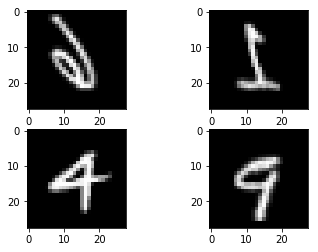

In [660]:
# plot 4 images as grayscale
plt.subplot(221)
plt.imshow(trainX[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(trainX[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(trainX[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(trainX[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [661]:
trainX = trainX/255
validationX = validationX/255
testX = testX/255

trainY = np_utils.to_categorical(trainY)
validationY = np_utils.to_categorical(validationY)
testY = np_utils.to_categorical(testY)


In [662]:
num_pixels = trainX.shape[1] * trainX.shape[2] * trainX.shape[3]
trainX = trainX.reshape(trainX.shape[0],
num_pixels).astype('float32')
validationX = validationX.reshape(validationX.shape[0],
num_pixels).astype('float32')
testX = testX.reshape(testX.shape[0], num_pixels).astype('float32')
model = Sequential()

In [663]:
model.add(Dense(350, input_dim=num_pixels, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [664]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [665]:
history = model.fit(trainX, trainY,
validation_data=(validationX,validationY), epochs=5)
training_accuracy = history.history['acc']
validation_accuracy = history.history['val_acc']
training_error = history.history['loss']
validation_error = history.history['val_loss']

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 51s 943us/step - loss: 0.9712 - acc: 0.7159 - val_loss: 0.6631 - val_acc: 0.7893
Epoch 2/5
54000/54000 [==============================] - 35s 647us/step - loss: 0.6097 - acc: 0.8091 - val_loss: 0.5930 - val_acc: 0.8153
Epoch 3/5
54000/54000 [==============================] - 35s 645us/step - loss: 0.5507 - acc: 0.8268 - val_loss: 0.5425 - val_acc: 0.8288
Epoch 4/5
54000/54000 [==============================] - 35s 647us/step - loss: 0.5015 - acc: 0.8424 - val_loss: 0.4982 - val_acc: 0.8412
Epoch 5/5
54000/54000 [==============================] - 35s 648us/step - loss: 0.4536 - acc: 0.8591 - val_loss: 0.4524 - val_acc: 0.8602


In [666]:
scores = model.evaluate(testX, testY, verbose=0)
print("MLP Error on test set: %.2f%%" % (100-scores[1]*100))
print("MLP Accuracy on test set: %.2f%%" % (scores[1]*100))

MLP Error on test set: 11.06%
MLP Accuracy on test set: 88.94%


In [667]:
'''    import os 
    import numpy as np 
    from keras.preprocessing import image
     
    PATH = os.getcwd()
     
    train_path = PATH+'\\data\\training'
    train_batch = os.listdir(train_path)
    x_train = []
     
    # if data are in form of images
    for sample in train_data:
        img_path = train_path+sample
        x = image.load_img(img_path)
        # preprocessing if required
        x_train.append(x)
     
    test_path = PATH+'\\data\\testing'
    test_batch = os.listdir(test_path)
    x_test = []
     
    for sample in test_data:
        img_path = test_path+sample
        x = image.load_img(img_path)
        # preprocessing if required
        x_test.append(x)
    
    # finally converting list into numpy array
    x_train = np.array(x_train)
    x_test = np.array(x_test)'''

"    import os \n    import numpy as np \n    from keras.preprocessing import image\n     \n    PATH = os.getcwd()\n     \n    train_path = PATH+'\\data\\training'\n    train_batch = os.listdir(train_path)\n    x_train = []\n     \n    # if data are in form of images\n    for sample in train_data:\n        img_path = train_path+sample\n        x = image.load_img(img_path)\n        # preprocessing if required\n        x_train.append(x)\n     \n    test_path = PATH+'\\data\\testing'\n    test_batch = os.listdir(test_path)\n    x_test = []\n     \n    for sample in test_data:\n        img_path = test_path+sample\n        x = image.load_img(img_path)\n        # preprocessing if required\n        x_test.append(x)\n    \n    # finally converting list into numpy array\n    x_train = np.array(x_train)\n    x_test = np.array(x_test)"